<a href="https://colab.research.google.com/github/AlejandroVasquez3/Cohort-18-Projects/blob/main/Project-2/Project_2_Housing_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title


## Problem Definition


- Supervied learning
- Regression
- Target being sales price
  - numerical
 - The goal is to

State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

## Data Collection/Sources


In [207]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

In [208]:
url =  "https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv"
pdf_url = "/content/housing_data_dictionary.csv"

In [209]:
!curl -s -I -XHEAD {url}

HTTP/1.1 200 OK
x-amz-id-2: 1uPHpPNohFBdUhha2Crwr/pISYPjzBZrLDBegilIB3sRataDOCpxBaDID5mKnacZMCRdrmztsq6s1lBP8ym1MjZ2GqxgOty3x8LxpxhCqPc=
x-amz-request-id: EMY88MJSBZ0J2FF4
Date: Wed, 18 Jun 2025 22:04:39 GMT
Last-Modified: Fri, 06 Oct 2023 04:00:27 GMT
ETag: "76e84c9ee7f6fd4d51276697f81e76e1"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 880420
Server: AmazonS3



In [210]:
!curl -s -O {url}

In [211]:
!ls -la

total 1880
drwxr-xr-x 1 root root   4096 Jun 18 21:51 .
drwxr-xr-x 1 root root   4096 Jun 18 21:48 ..
drwxr-xr-x 4 root root   4096 Jun 17 13:36 .config
-rw-r--r-- 1 root root 127215 Jun 18 22:02 final_variable_hist.png
-rw-r--r-- 1 root root 880420 Jun 18 22:04 Housing.Data.csv
-rw-r--r-- 1 root root  64923 Jun 18 22:01 housing_float_clean_hist.png
-rw-r--r-- 1 root root  47465 Jun 18 22:01 inital_corr_high.png
-rw-r--r-- 1 root root  47760 Jun 18 22:01 inital_corr.png
-rw-r--r-- 1 root root  61041 Jun 18 22:02 int_float_corr_AD.png
-rw-r--r-- 1 root root 124801 Jun 18 22:02 int_float_corr_BD.png
-rw-r--r-- 1 root root  75563 Jun 18 22:01 lasso_pred_true_scatter.png
-rw-r--r-- 1 root root  78332 Jun 18 22:01 lasso_residuals_pred.png
-rw-r--r-- 1 root root  78358 Jun 18 22:00 linear_pred_true_scatter.png
-rw-r--r-- 1 root root  71256 Jun 18 22:00 linear_residuals_pred.png
-rw-r--r-- 1 root root  59391 Jun 18 22:01 regression_model_coefficients_comparison.png
-rw-r--r-- 1 root root  747

#### Housing Data

In [212]:
housing_data = pd.read_csv(url)
print(housing_data.shape)

(2637, 81)


In [213]:
housing_data_copy = housing_data.copy()

## Data Cleaning


In [214]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [215]:
(
    housing_data
      .describe()
      .transpose()
      .query("count < 2637")
      .sort_values("count")
)

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2188.0,69.166819,23.356779,21.0,58.00,68.0,80.00,313.0
Garage Yr Blt,2490.0,1978.185944,25.452647,1895.0,1961.00,1979.0,2002.00,2207.0
Mas Vnr Area,2614.0,101.887911,179.578232,0.0,0.00,0.0,164.00,1600.0
Bsmt Full Bath,2635.0,0.432258,0.525239,0.0,0.00,0.0,1.00,3.0
Bsmt Half Bath,2635.0,0.058824,0.240130,0.0,0.00,0.0,0.00,2.0
BsmtFin SF 2,2636.0,51.068665,172.521803,0.0,0.00,0.0,0.00,1526.0
Total Bsmt SF,2636.0,1045.179059,429.686089,0.0,792.00,988.0,1290.25,6110.0
BsmtFin SF 1,2636.0,438.441199,449.602326,0.0,0.00,368.0,732.00,5644.0
Bsmt Unf SF,2636.0,555.669196,436.223188,0.0,218.00,464.5,797.25,2336.0
Garage Cars,2636.0,1.763278,0.760576,0.0,1.00,2.0,2.00,5.0


In [216]:
housing_data.dtypes.value_counts()

,count
object,43
int64,27
float64,11


In [217]:
# Finding columns with 2 or less uniqie variables
foo = housing_data.nunique()
foo [foo<=2]


,0
Street,2
Alley,2
Central Air,2


### Checking NaN and Zeros in Rows

### Checking NaN and Zeros in Columns

In [218]:
# Finding the columns with NaN and print the list made
nan_columns = []
for column in housing_data.columns:
  if housing_data[column].isna().any():
    nan_columns.append(column)
print(f"Columns with NaN: {nan_columns}")
print(f"Total Columns with NaN: {len(nan_columns)}")

Columns with NaN: ['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']
Total Columns with NaN: 26


In [219]:
# Finding the columns with Zeros and print the list made
zero_columns = []
for column in housing_data.columns:
  if (housing_data[column] == 0).any():
    zero_columns.append(column)
print(f"Columns with Zeros: {zero_columns}")
print(f"Total Columns with Zeros: {len(zero_columns)}")

Columns with Zeros: ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '2nd Flr SF', 'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']
Total Columns with Zeros: 23


In [220]:
housing_data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

### Float Data Frame

In [221]:
# Data frame of float values
housing_data_float = housing_data.select_dtypes(include=["float"])
# Sales price data series
housing_data_salesprice = housing_data['SalePrice']#.astype("float")
# Combining data frames
housing_data__float_test = pd.concat([housing_data_float, housing_data_salesprice], axis = 1)

housing_data__float_test.head(10)
# housing_data__float_test.info()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
0,62.0,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,2.0,440.0,115400
1,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2.0,516.0,90000
2,50.0,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,1.0,544.0,141000
3,68.0,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,2.0,592.0,254000
4,60.0,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,2.0,576.0,155000
5,70.0,0.0,842.0,0.0,70.0,912.0,0.0,0.0,1974.0,1.0,336.0,125000
6,64.0,82.0,724.0,0.0,508.0,1232.0,1.0,0.0,2007.0,2.0,632.0,194500
7,66.0,0.0,0.0,0.0,1163.0,1163.0,0.0,0.0,1955.0,2.0,396.0,185000
8,NaN,0.0,735.0,0.0,257.0,992.0,1.0,0.0,2000.0,3.0,839.0,235000
9,40.0,0.0,370.0,0.0,779.0,1149.0,0.0,0.0,1926.0,1.0,216.0,152000


In [222]:
(
    housing_data__float_test
      .describe(include="all")
      .transpose()
      .sort_values("count")
)

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2188.0,69.166819,23.356779,21.0,58.00,68.0,80.00,313.0
Garage Yr Blt,2490.0,1978.185944,25.452647,1895.0,1961.00,1979.0,2002.00,2207.0
Mas Vnr Area,2614.0,101.887911,179.578232,0.0,0.00,0.0,164.00,1600.0
Bsmt Full Bath,2635.0,0.432258,0.525239,0.0,0.00,0.0,1.00,3.0
Bsmt Half Bath,2635.0,0.058824,0.240130,0.0,0.00,0.0,0.00,2.0
BsmtFin SF 2,2636.0,51.068665,172.521803,0.0,0.00,0.0,0.00,1526.0
Total Bsmt SF,2636.0,1045.179059,429.686089,0.0,792.00,988.0,1290.25,6110.0
BsmtFin SF 1,2636.0,438.441199,449.602326,0.0,0.00,368.0,732.00,5644.0
Bsmt Unf SF,2636.0,555.669196,436.223188,0.0,218.00,464.5,797.25,2336.0
Garage Cars,2636.0,1.763278,0.760576,0.0,1.00,2.0,2.00,5.0


In [223]:
housing_data__float_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2188 non-null   float64
 1   Mas Vnr Area    2614 non-null   float64
 2   BsmtFin SF 1    2636 non-null   float64
 3   BsmtFin SF 2    2636 non-null   float64
 4   Bsmt Unf SF     2636 non-null   float64
 5   Total Bsmt SF   2636 non-null   float64
 6   Bsmt Full Bath  2635 non-null   float64
 7   Bsmt Half Bath  2635 non-null   float64
 8   Garage Yr Blt   2490 non-null   float64
 9   Garage Cars     2636 non-null   float64
 10  Garage Area     2636 non-null   float64
 11  SalePrice       2637 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 247.3 KB


In [224]:
# Drop Na or fill NA
housing_data__float_test.dropna(axis=0, inplace=True)
housing_data__float_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, 0 to 2636
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2033 non-null   float64
 1   Mas Vnr Area    2033 non-null   float64
 2   BsmtFin SF 1    2033 non-null   float64
 3   BsmtFin SF 2    2033 non-null   float64
 4   Bsmt Unf SF     2033 non-null   float64
 5   Total Bsmt SF   2033 non-null   float64
 6   Bsmt Full Bath  2033 non-null   float64
 7   Bsmt Half Bath  2033 non-null   float64
 8   Garage Yr Blt   2033 non-null   float64
 9   Garage Cars     2033 non-null   float64
 10  Garage Area     2033 non-null   float64
 11  SalePrice       2033 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 206.5 KB


In [225]:
(
    housing_data__float_test
      .describe(include="all")
      .transpose()
      .sort_values("count")
)

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2033.0,69.611904,23.403185,21.0,59.0,69.0,80.0,313.0
Mas Vnr Area,2033.0,104.950812,183.982305,0.0,0.0,0.0,169.0,1600.0
BsmtFin SF 1,2033.0,435.367437,459.471209,0.0,0.0,358.0,724.0,5644.0
BsmtFin SF 2,2033.0,50.030005,168.679195,0.0,0.0,0.0,0.0,1474.0
Bsmt Unf SF,2033.0,575.289228,443.413756,0.0,231.0,483.0,815.0,2336.0
Total Bsmt SF,2033.0,1060.686670,436.855698,0.0,792.0,991.0,1313.0,6110.0
Bsmt Full Bath,2033.0,0.424004,0.516704,0.0,0.0,0.0,1.0,2.0
Bsmt Half Bath,2033.0,0.057550,0.237136,0.0,0.0,0.0,0.0,2.0
Garage Yr Blt,2033.0,1977.728480,26.093979,1895.0,1959.0,1979.0,2003.0,2010.0
Garage Cars,2033.0,1.857354,0.667228,1.0,1.0,2.0,2.0,5.0


In [226]:
housing_data__float_test.corr() *1000

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
Lot Frontage,1000.000000,222.444180,219.235514,31.789064,113.155096,357.713284,118.205341,-43.326193,91.114677,316.999247,376.225682,353.583846
Mas Vnr Area,222.444180,1000.000000,310.326236,-43.921366,92.422843,403.242788,161.279130,-33.379771,271.761329,363.478521,374.082563,523.400508
BsmtFin SF 1,219.235514,310.326236,1000.000000,-58.864469,-487.853046,533.863349,643.038386,69.358321,191.797184,217.463036,278.636511,434.639717
BsmtFin SF 2,31.789064,-43.921366,-58.864469,1000.000000,-250.209205,70.243934,182.792377,103.192696,-58.353305,-54.672020,-30.607531,-15.075149
Bsmt Unf SF,113.155096,92.422843,-487.853046,-250.209205,1000.000000,405.292275,-412.599670,-119.022764,189.184997,248.845572,222.307041,191.868141
Total Bsmt SF,357.713284,403.242788,533.863349,70.243934,405.292275,1000.000000,328.114128,-8.015732,371.219892,460.192055,506.887289,646.068132
Bsmt Full Bath,118.205341,161.279130,643.038386,182.792377,-412.599670,328.114128,1000.000000,-130.968642,151.842412,154.109014,187.593768,288.550527
Bsmt Half Bath,-43.326193,-33.379771,69.358321,103.192696,-119.022764,-8.015732,-130.968642,1000.000000,-43.840222,-53.840714,-50.672815,-60.585992
Garage Yr Blt,91.114677,271.761329,191.797184,-58.353305,189.184997,371.219892,151.842412,-43.840222,1000.000000,598.677596,586.652657,547.303332
Garage Cars,316.999247,363.478521,217.463036,-54.672020,248.845572,460.192055,154.109014,-53.840714,598.677596,1000.000000,852.322280,657.322885


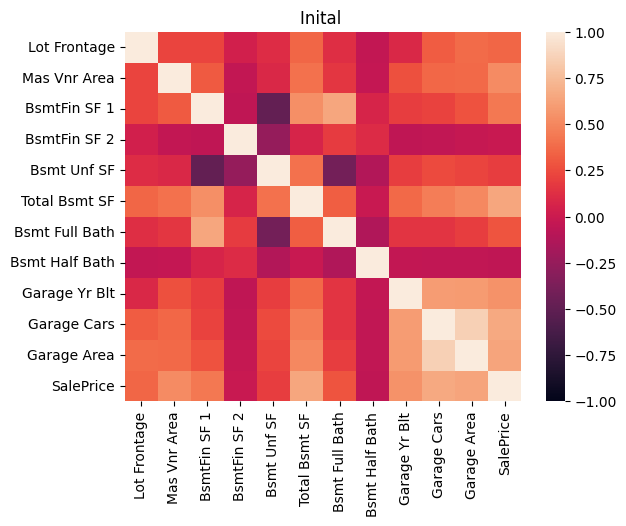

In [227]:
# Let's take a look at a correlation plot
# plt.figure(figsize=(15,15))
correlation_matrix = housing_data__float_test.corr()
sns.heatmap(data=correlation_matrix, annot=False, vmin=-1)
plt.title("Inital ")
plt.savefig("inital_corr.png", bbox_inches='tight')
plt.show();

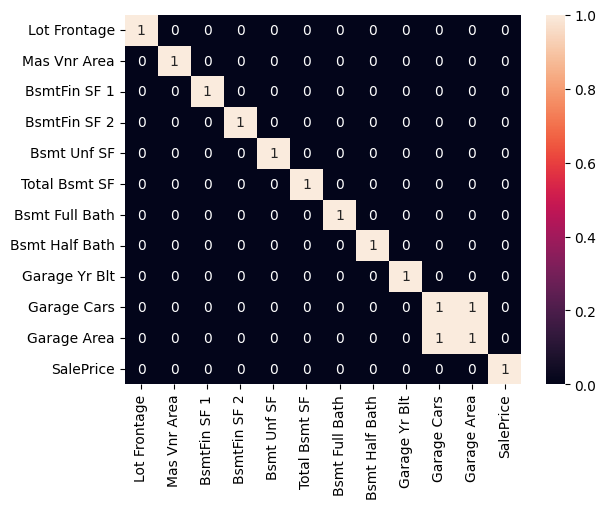

In [228]:
correlation_matrix = housing_data__float_test.corr() >0.7
sns.heatmap(data=correlation_matrix, annot=True) ;
plt.savefig("inital_corr_high.png", bbox_inches='tight')
plt.show();

In [229]:
# Dropped column Garage Cars over 0.7 Corr
housing_data__float_test.drop(columns='Garage Cars', inplace=True)

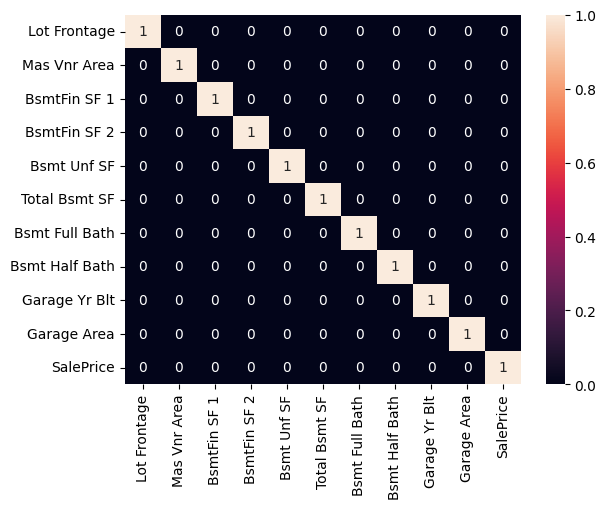

In [230]:
correlation_matrix = housing_data__float_test.corr() >0.7
sns.heatmap(data=correlation_matrix, annot=True) ;

In [231]:
housing_float_clean = housing_data__float_test.copy()

In [232]:
housing_float_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, 0 to 2636
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2033 non-null   float64
 1   Mas Vnr Area    2033 non-null   float64
 2   BsmtFin SF 1    2033 non-null   float64
 3   BsmtFin SF 2    2033 non-null   float64
 4   Bsmt Unf SF     2033 non-null   float64
 5   Total Bsmt SF   2033 non-null   float64
 6   Bsmt Full Bath  2033 non-null   float64
 7   Bsmt Half Bath  2033 non-null   float64
 8   Garage Yr Blt   2033 non-null   float64
 9   Garage Area     2033 non-null   float64
 10  SalePrice       2033 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 190.6 KB


## Exploratory Data Analysis


<Figure size 640x480 with 0 Axes>

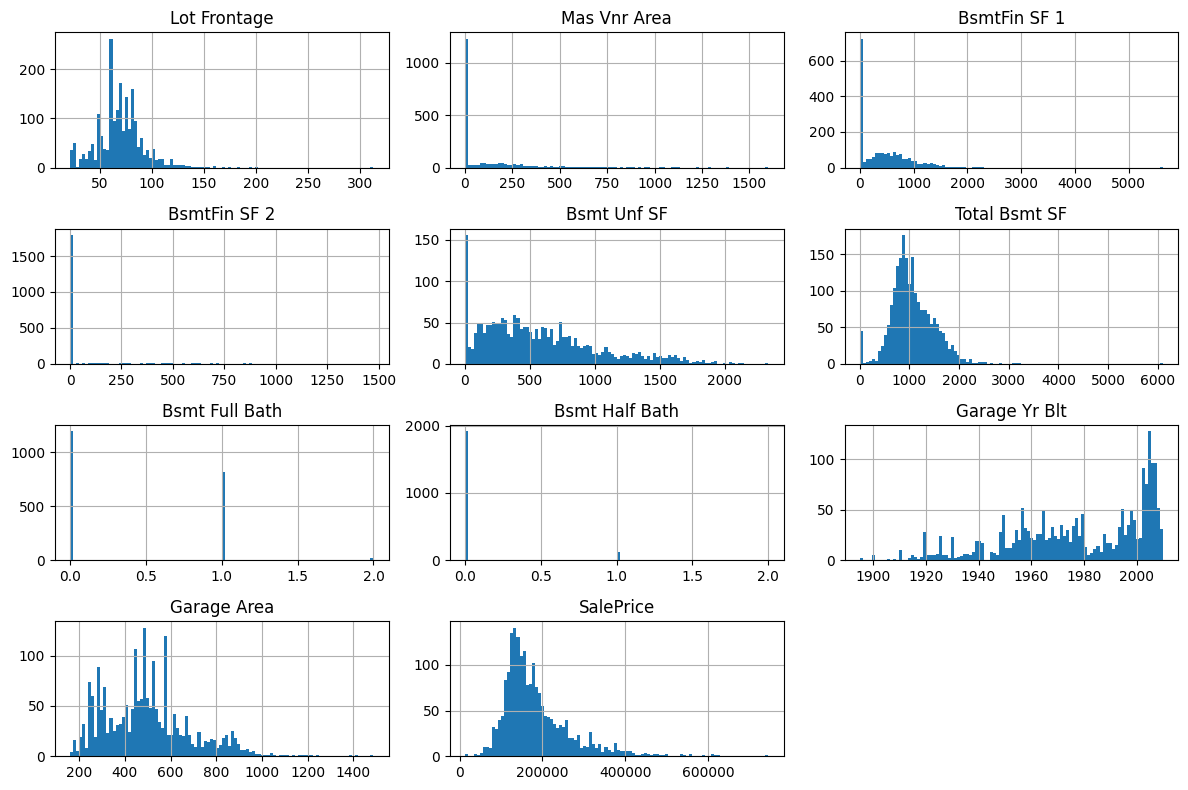

In [233]:
plt.figure();
housing_float_clean.hist(bins=100, figsize=(12,8));
plt.tight_layout();

plt.savefig("housing_float_clean_hist.png");
plt.show();

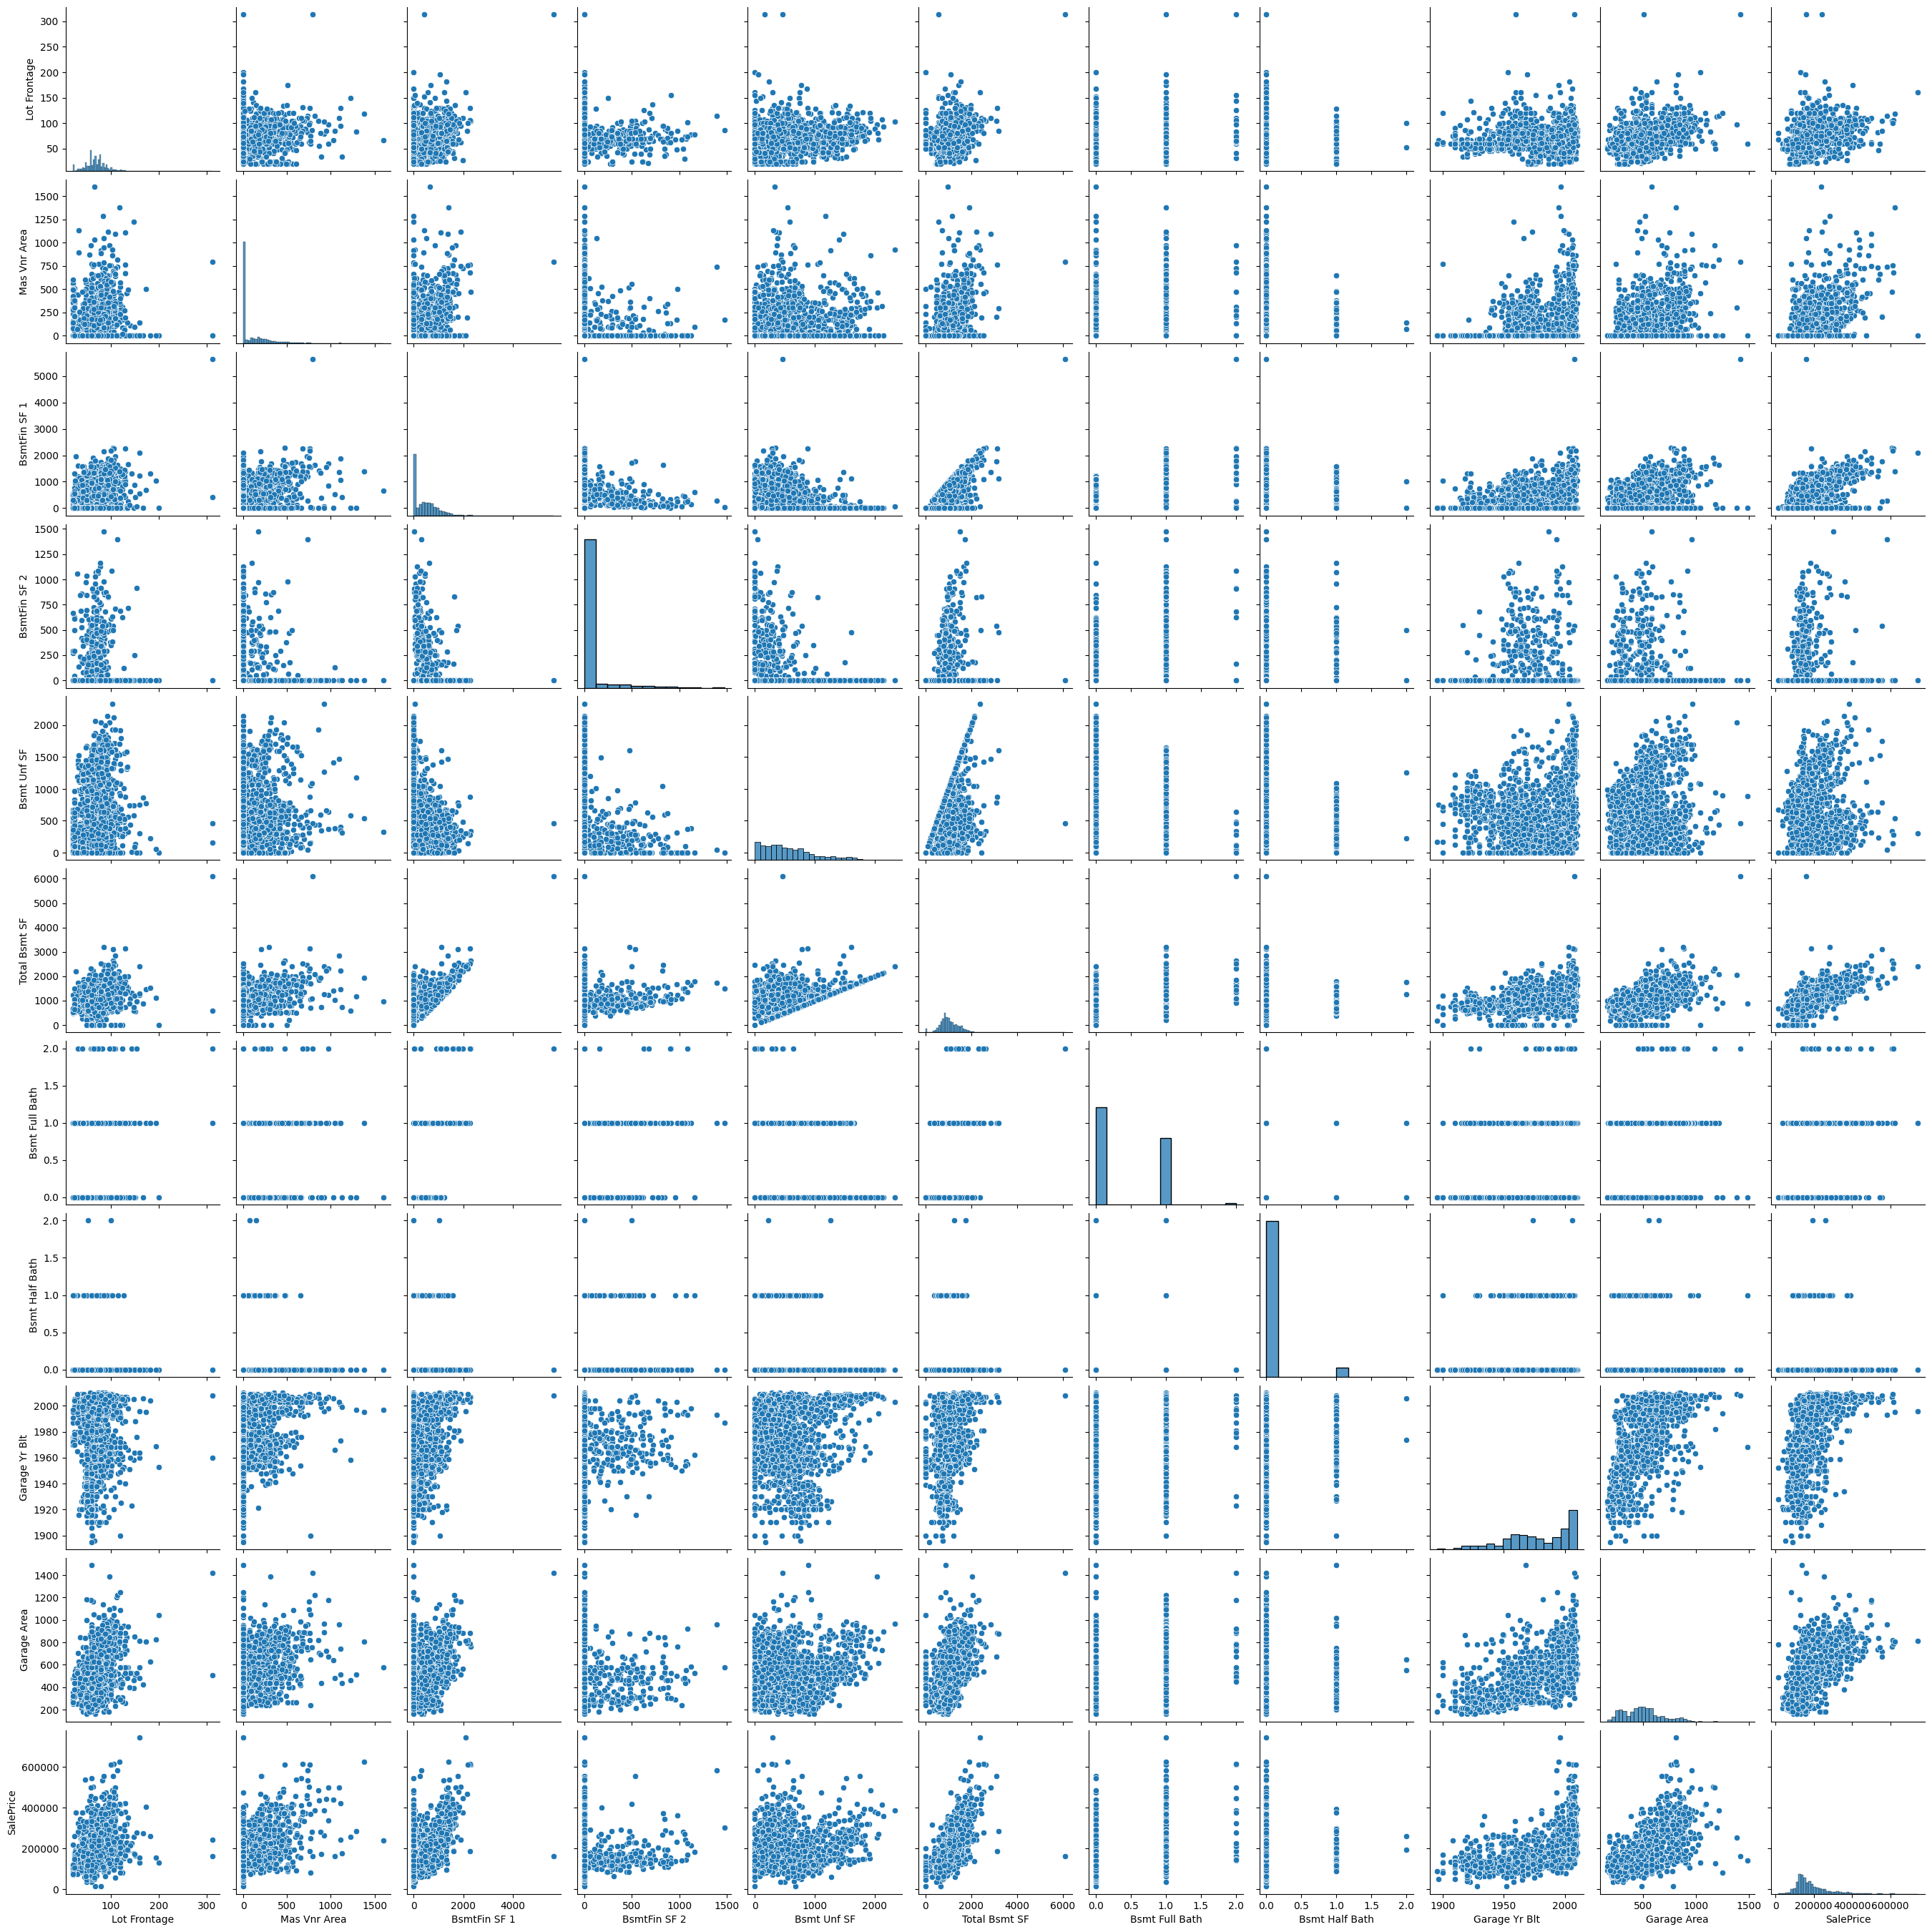

In [234]:
sns.pairplot(housing_float_clean)

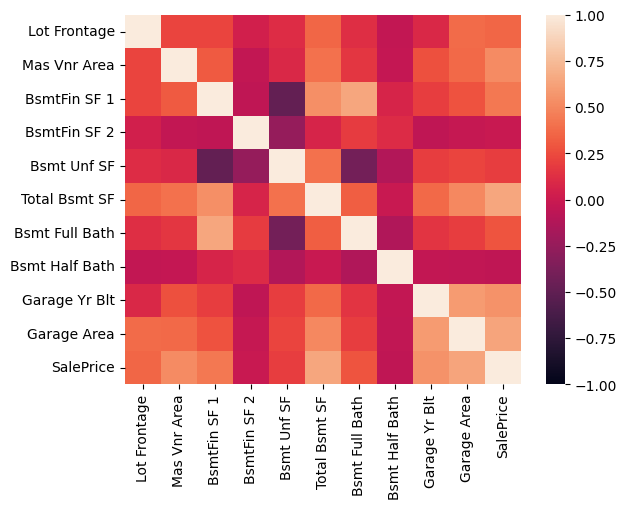

In [235]:
correlation_matrix = housing_float_clean.corr()
sns.heatmap(data=correlation_matrix, annot=False, vmin=-1) ;

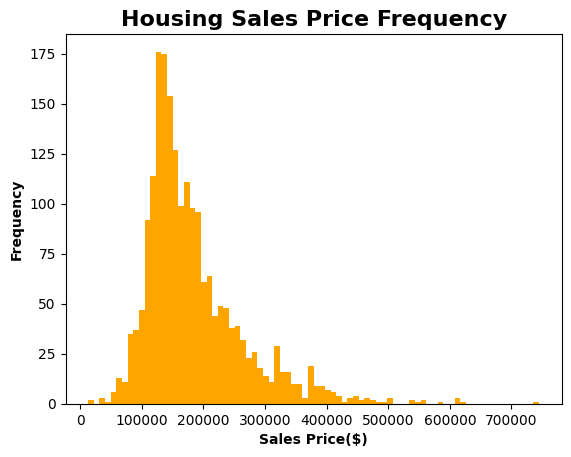

In [236]:
plt.hist(housing_float_clean["SalePrice"], bins = 80, color="orange");
plt.xlabel("Sales Price($)", weight= "bold")
plt.ylabel("Frequency", weight= "bold")
plt.title('Housing Sales Price Frequency', weight= "bold", size=16)
plt.savefig("sales_price_freq.png", bbox_inches='tight')
plt.show();

## Processing


### Refining Predictor Choices

In [237]:
# Data frame of int values
housing_data_int = housing_data.select_dtypes(include=["int"])
housing_data_int.drop(columns='SalePrice', inplace= True)


In [238]:
# Combining Int and Float data frames
housing_data_int_float_df = pd.concat([housing_data_int,housing_float_clean], axis = 1,)


In [239]:
# drop NaN in Data frame
housing_data_int_float_df.dropna(axis=0, inplace= True)
housing_data_int_float_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, 0 to 2636
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2033 non-null   int64  
 1   MS SubClass      2033 non-null   int64  
 2   Lot Area         2033 non-null   int64  
 3   Overall Qual     2033 non-null   int64  
 4   Overall Cond     2033 non-null   int64  
 5   Year Built       2033 non-null   int64  
 6   Year Remod/Add   2033 non-null   int64  
 7   1st Flr SF       2033 non-null   int64  
 8   2nd Flr SF       2033 non-null   int64  
 9   Low Qual Fin SF  2033 non-null   int64  
 10  Gr Liv Area      2033 non-null   int64  
 11  Full Bath        2033 non-null   int64  
 12  Half Bath        2033 non-null   int64  
 13  Bedroom AbvGr    2033 non-null   int64  
 14  Kitchen AbvGr    2033 non-null   int64  
 15  TotRms AbvGrd    2033 non-null   int64  
 16  Fireplaces       2033 non-null   int64  
 17  Wood Deck SF     20

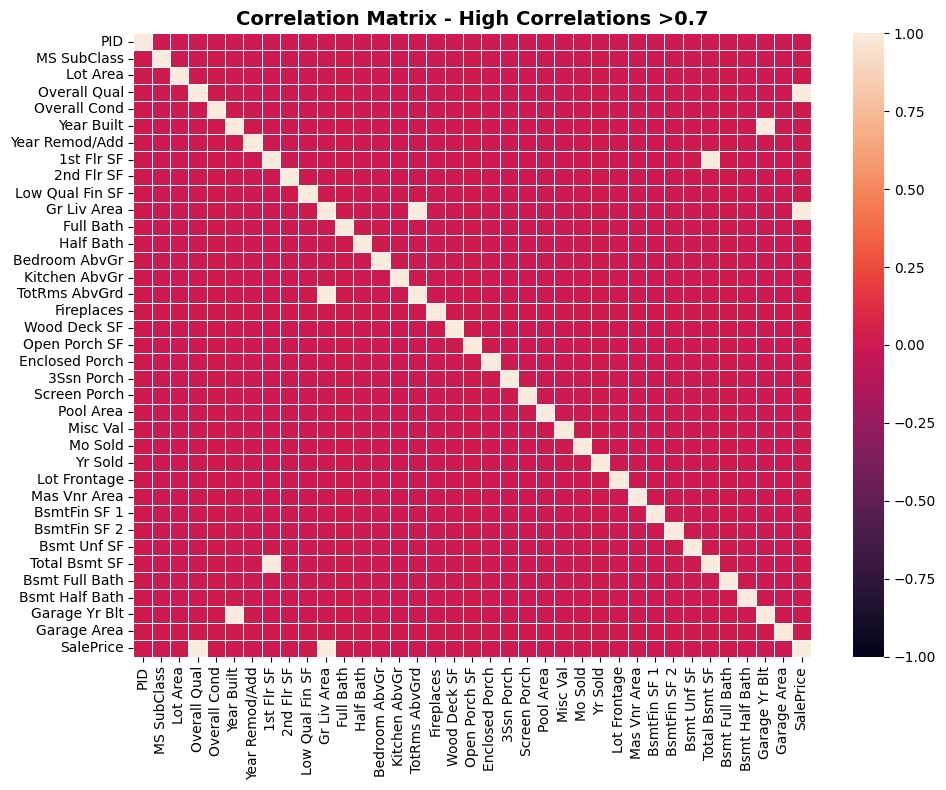

In [240]:
corr = housing_data_int_float_df.corr()>0.7
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, annot=False, vmin=-1, xticklabels=True, yticklabels=True,linewidths=0.5)
plt.title("Correlation Matrix - High Correlations >0.7", weight= "bold", fontsize=14)
plt.tight_layout();
plt.savefig('int_float_corr_BD.png', bbox_inches='tight');
plt.show();

In [241]:
# Trial 3 testing Float and int dropping
cols_drop_t3 = ["TotRms AbvGrd", "1st Flr SF","Half Bath","Bsmt Half Bath","Full Bath", "BsmtFin SF 2","Bsmt Unf SF", "Garage Yr Blt", "PID", "Mo Sold", "Misc Val", "Low Qual Fin SF", "Open Porch SF", "Yr Sold", "3Ssn Porch", "Enclosed Porch", "Fireplaces", "Lot Frontage","Screen Porch", "Wood Deck SF", "Pool Area", "Lot Area","Kitchen AbvGr", "Mas Vnr Area", "2nd Flr SF"]
housing_data_int_float_df = housing_data_int_float_df.drop(columns=cols_drop_t3)

In [242]:
housing_data_int_float_df.dtypes.value_counts()

,count
int64,7
float64,5


In [243]:
housing_data_int_float_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, 0 to 2636
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     2033 non-null   int64  
 1   Overall Qual    2033 non-null   int64  
 2   Overall Cond    2033 non-null   int64  
 3   Year Built      2033 non-null   int64  
 4   Year Remod/Add  2033 non-null   int64  
 5   Gr Liv Area     2033 non-null   int64  
 6   Bedroom AbvGr   2033 non-null   int64  
 7   BsmtFin SF 1    2033 non-null   float64
 8   Total Bsmt SF   2033 non-null   float64
 9   Bsmt Full Bath  2033 non-null   float64
 10  Garage Area     2033 non-null   float64
 11  SalePrice       2033 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 206.5 KB


In [244]:
housing_data_int_float_df.describe().transpose().sort_index()

,count,mean,std,min,25%,50%,75%,max
Bedroom AbvGr,2033.0,2.843089,0.785243,0.0,2.0,3.0,3.0,6.0
Bsmt Full Bath,2033.0,0.424004,0.516704,0.0,0.0,0.0,1.0,2.0
BsmtFin SF 1,2033.0,435.367437,459.471209,0.0,0.0,358.0,724.0,5644.0
Garage Area,2033.0,497.246434,190.145696,160.0,351.0,482.0,583.0,1488.0
Gr Liv Area,2033.0,1501.508608,490.519627,438.0,1143.0,1452.0,1734.0,5642.0
MS SubClass,2033.0,56.448598,42.018807,20.0,20.0,50.0,70.0,190.0
Overall Cond,2033.0,5.583866,1.074936,1.0,5.0,5.0,6.0,9.0
Overall Qual,2033.0,6.187408,1.420740,1.0,5.0,6.0,7.0,10.0
SalePrice,2033.0,183745.530251,81566.772763,12789.0,130000.0,160000.0,215000.0,745000.0
Total Bsmt SF,2033.0,1060.686670,436.855698,0.0,792.0,991.0,1313.0,6110.0


<Figure size 640x480 with 0 Axes>

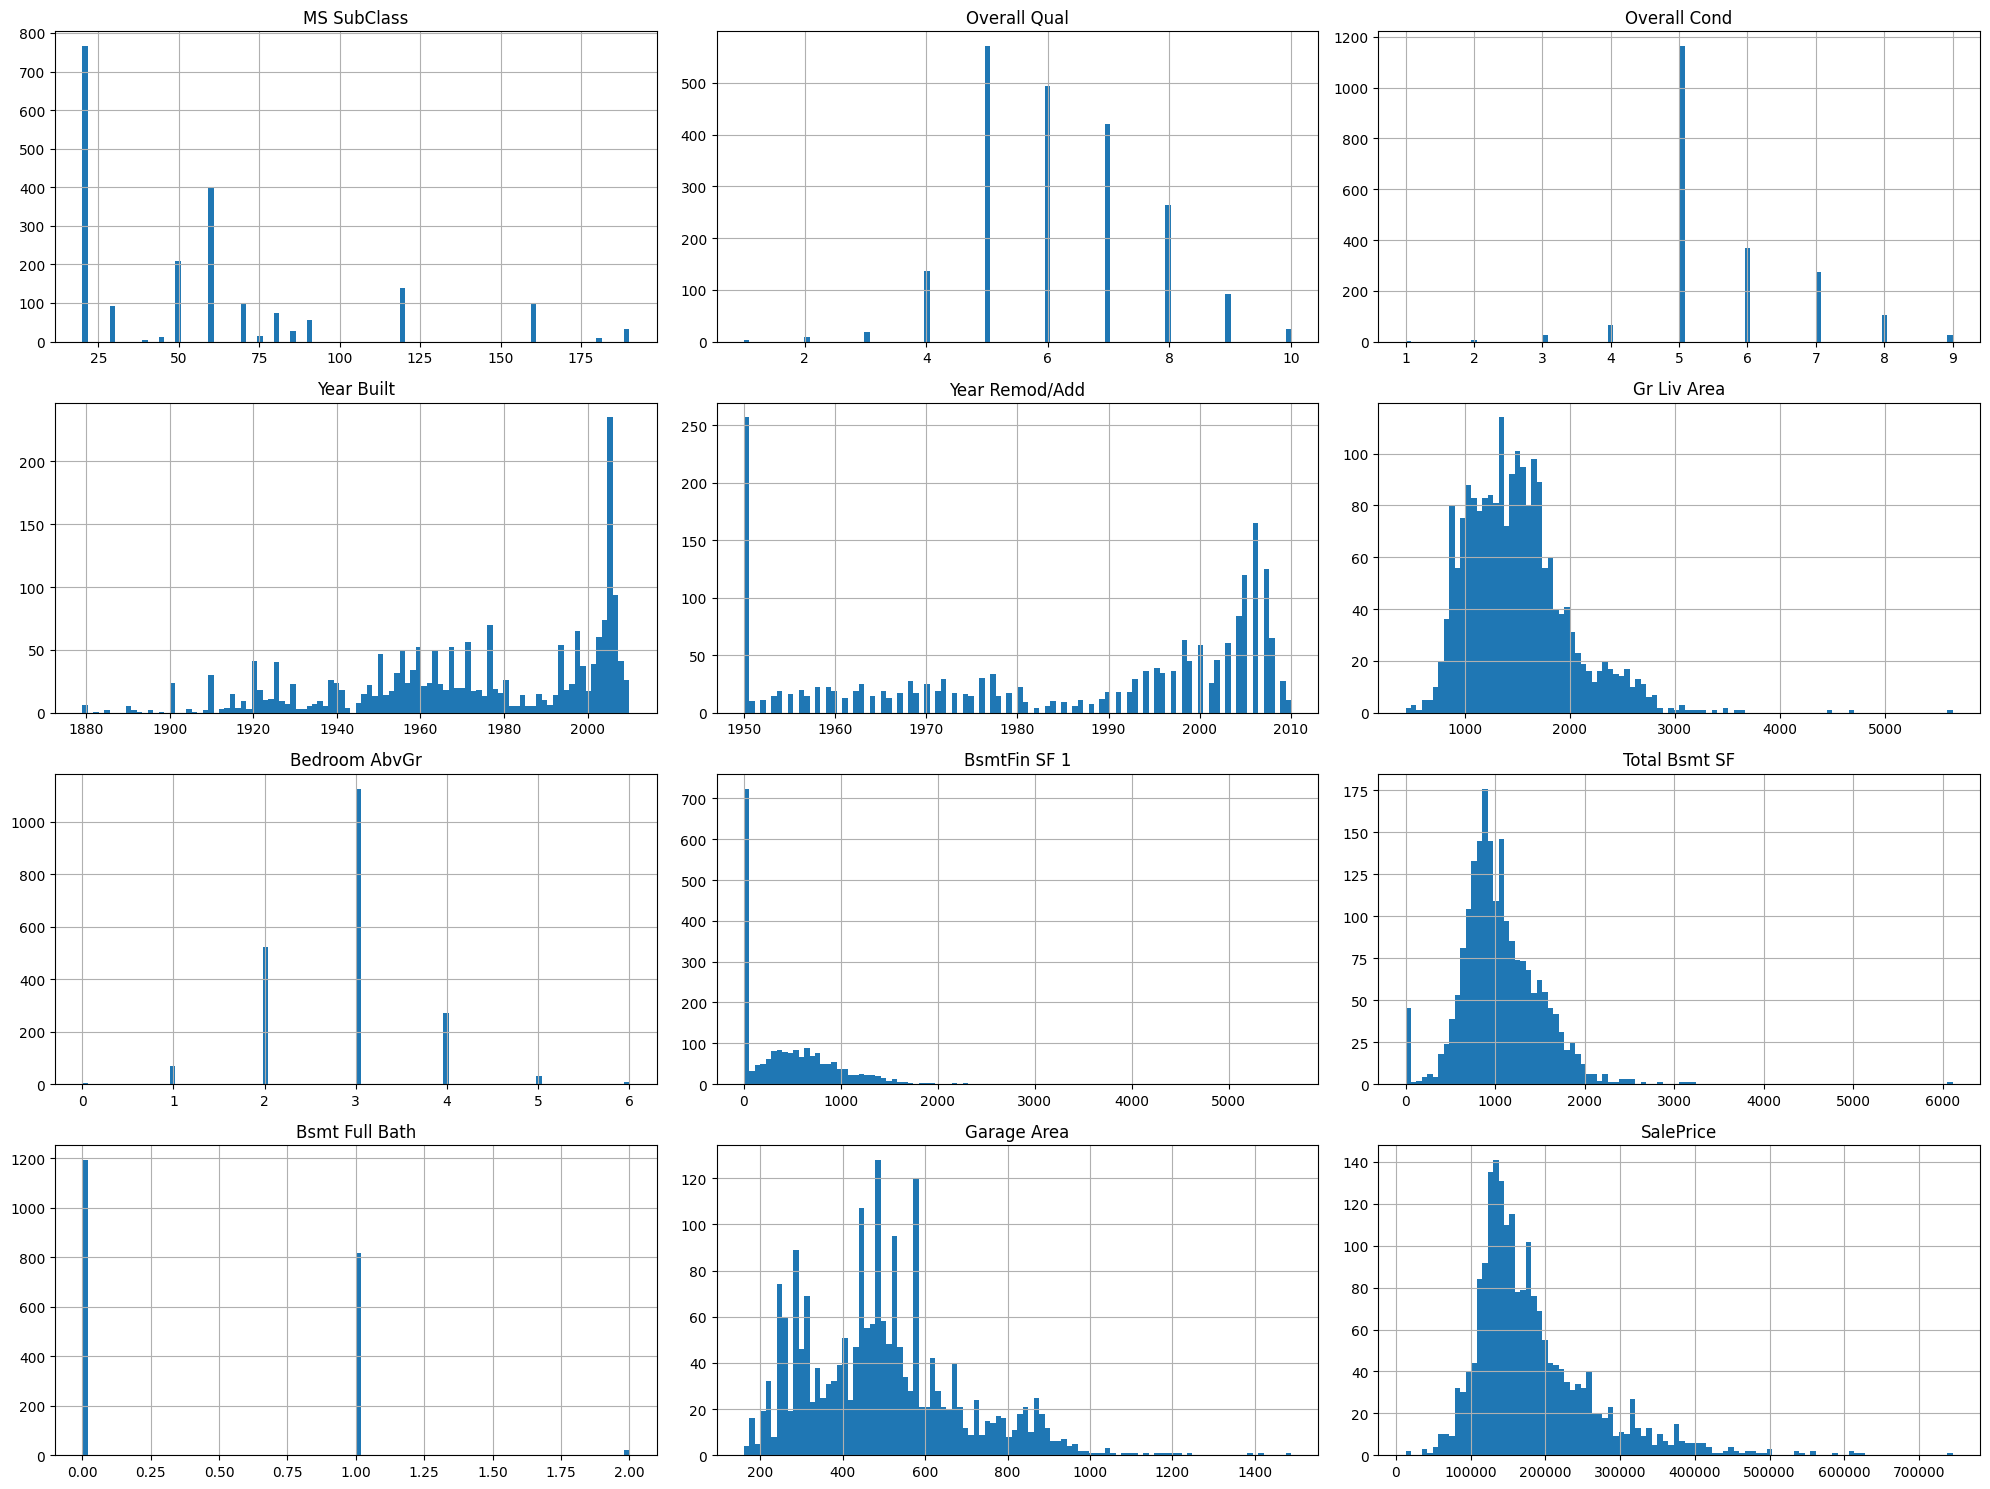

In [245]:
plt.figure();
housing_data_int_float_df.hist(bins=100, figsize=(20, 15))
plt.tight_layout();
plt.savefig('final_variable_hist.png', bbox_inches='tight');
plt.show();

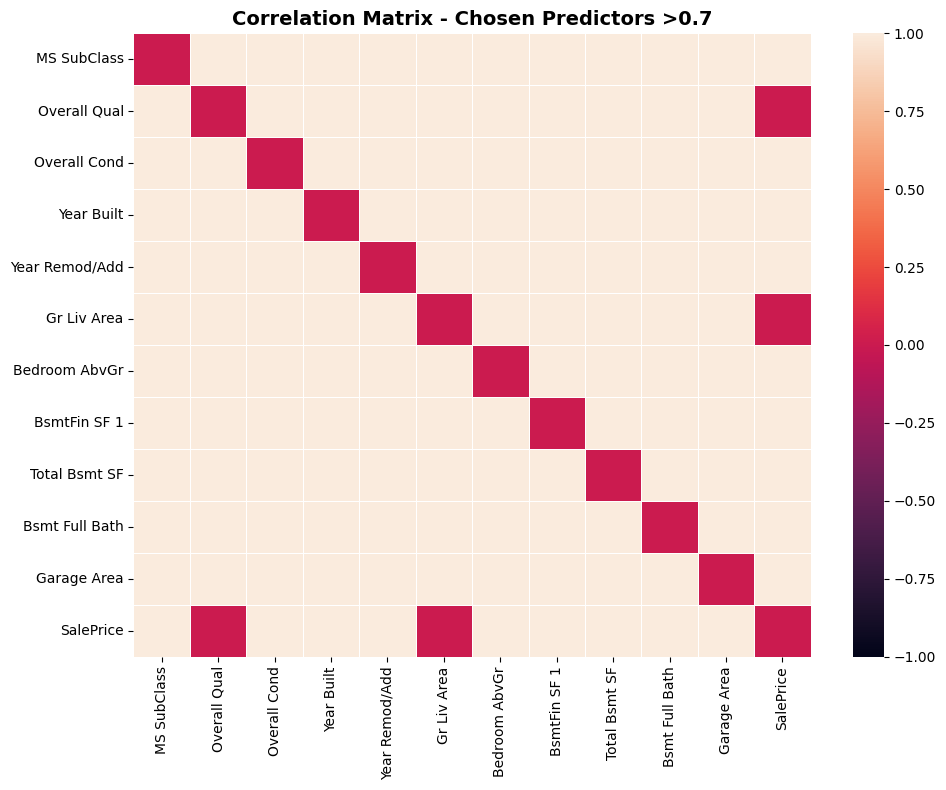

In [246]:
corr = housing_data_int_float_df.corr()<0.7
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, annot=False, vmin=-1, xticklabels=True, yticklabels=True,linewidths=0.5)
plt.title("Correlation Matrix - Chosen Predictors >0.7", weight= "bold", fontsize=14)
plt.tight_layout();
plt.savefig('int_float_corr_AD.png', bbox_inches='tight');
plt.show();

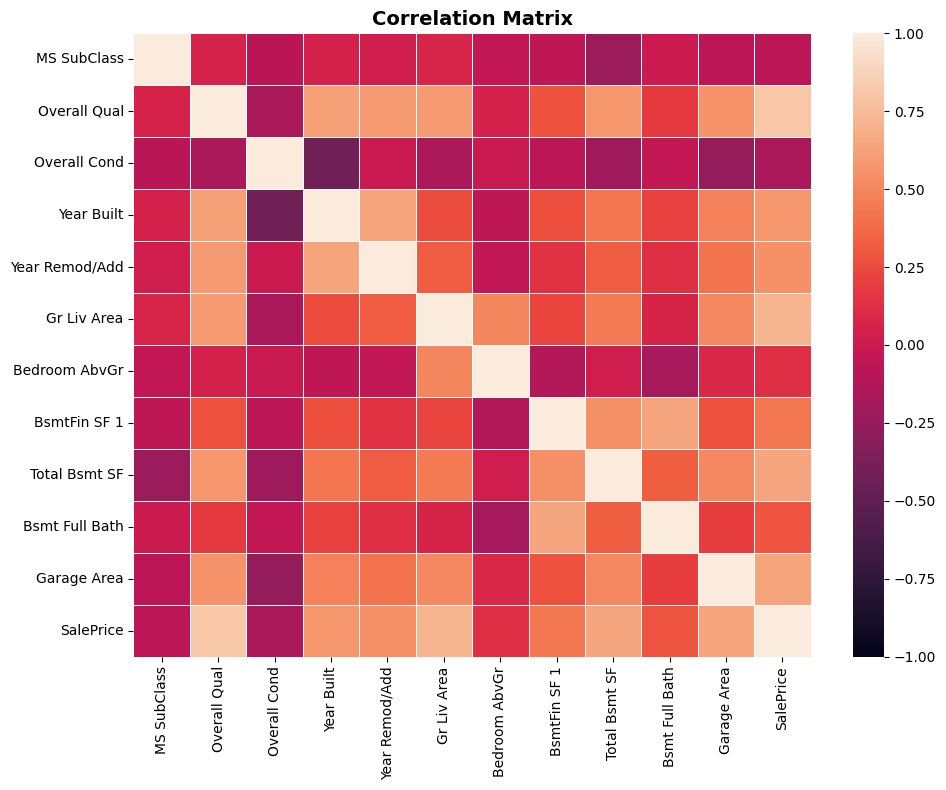

In [247]:
corr = housing_data_int_float_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, annot=False, vmin=-1, xticklabels=True, yticklabels=True,linewidths=0.5)
plt.title("Correlation Matrix", weight= "bold", fontsize=14)
plt.tight_layout();
plt.savefig('int_float_corr_AD.png', bbox_inches='tight');
plt.show();



---


### Regularization - Linear Regression

In [248]:
# First we will break up our data into training and testing sets
X_linear = housing_data_int_float_df.drop(["SalePrice"], axis = 1).copy()
y_linear = housing_data_int_float_df['SalePrice']


# Specify values of alpha we want to try
alph = [ 20,50,120,150,200, 500]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Calculate CV RMSE
  n = 200
  results = np.zeros(n)

  for idx in range(n):
    # Create the model
    my_fit_linear = Lasso(alpha = i, tol = .01, max_iter=10_000); # Looping through alpha

    # Train, test split
    X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.25)

    # Standard scale only training features
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    # Scale testing features
    X_test = scaler.transform(X_test)

    # Fit regression
    my_fit_linear.fit(X_train, y_train)

    # Predict
    y_pred = my_fit_linear.predict(X_test)

    # Calculate and record performance metric
    results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))

  results_alpha.append(results.mean())

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})

results_df.sort_values( by = 'RMSE' )
alpha = results_df.sort_values( by = 'RMSE' )["Alpha"].iloc[0]

print(f"Alpha: {alpha}")

# %%capture --no-stdout
# Perform CV
n = 500
results = np.zeros(n)

for idx in range(n):
  # Train, test split
  X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.25)

  # Standard scale only training features
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)

  # Scale testing features
  X_test = scaler.transform(X_test)

  # Create the model
  model = Lasso(alpha = alpha, tol = .01, max_iter=10000)

  # Fit regression
  model.fit(X_train, y_train)

  # Predict
  y_pred = model.predict(X_test)

  # Calculate and record performance metric
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))

print(f"CV RMSE: {results.mean().round(2)}")
# RMSPE
rmspe_housing_float = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"RMSPE for Linear Regression: {rmspe_housing_float:.4f}%")

Alpha: 500
CV RMSE: 34596.03
RMSPE for Linear Regression: 18.3170%


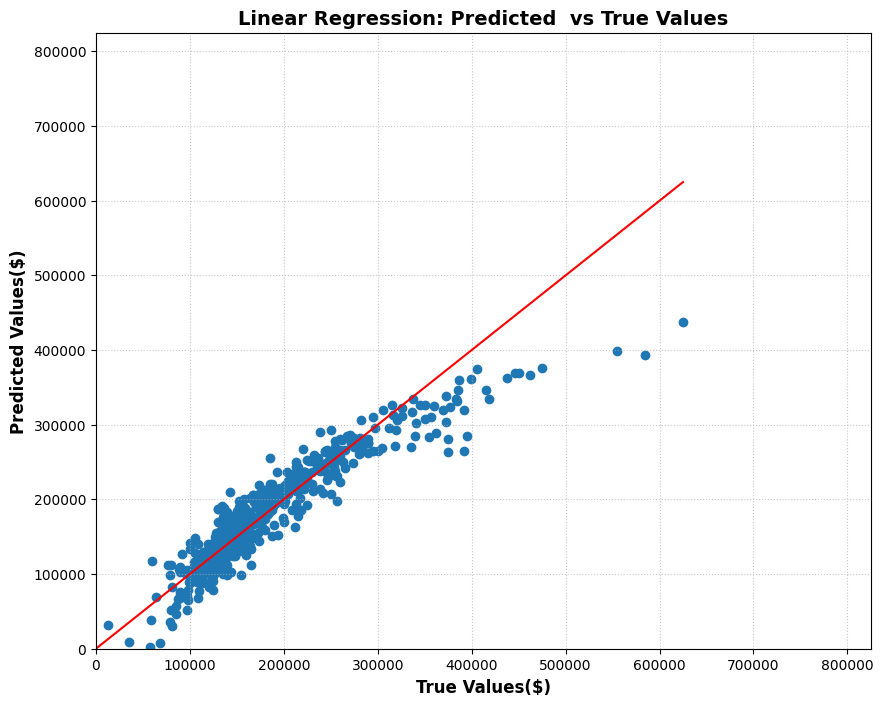

In [249]:
# Generate figure of predicted vs actual results
plt.figure(figsize=(10,8));
plt.scatter(y_test, y_pred);
p1 = max(y_pred.max(), y_test.max())
plt.plot([0, p1],[0, p1], c='red')
plt.ylim(0,825000)
plt.xlim(0,825000)
plt.title('Linear Regression: Predicted  vs True Values', weight='bold', fontsize=14)
plt.xlabel('True Values($)', weight='bold', fontsize=12)
plt.ylabel('Predicted Values($)', weight='bold', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.savefig("linear_pred_true_scatter.png", bbox_inches='tight')
plt.show();

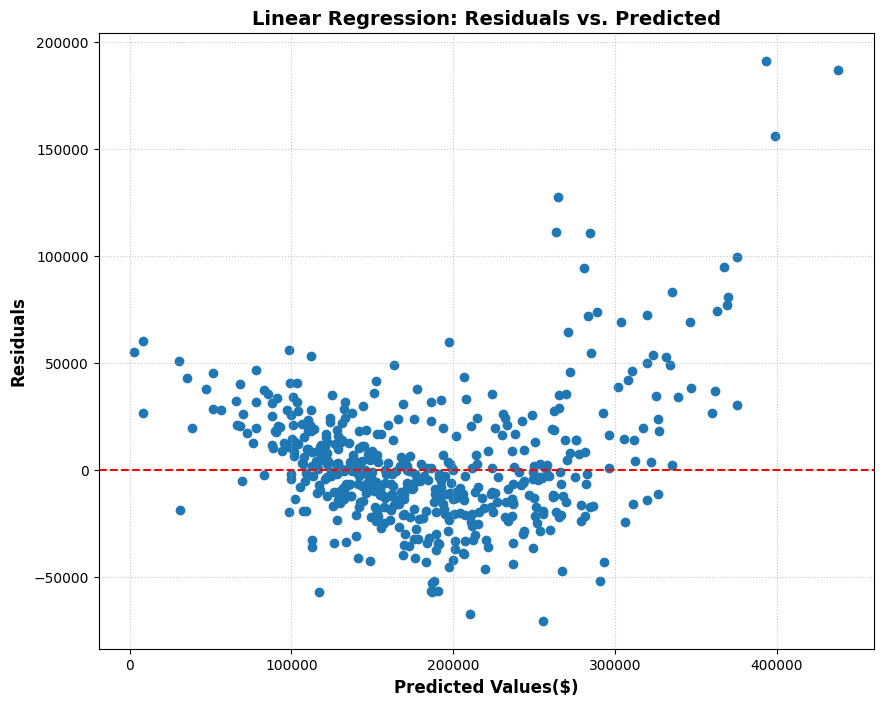

In [250]:
plt.figure(figsize=(10,8));
residuals = y_test - y_pred
plt.scatter(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Linear Regression: Residuals vs. Predicted', weight='bold', fontsize=14)
plt.xlabel('Predicted Values($)', weight='bold', fontsize=12)
plt.ylabel('Residuals', weight='bold', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.savefig("linear_residuals_pred.png", bbox_inches='tight')
plt.show();

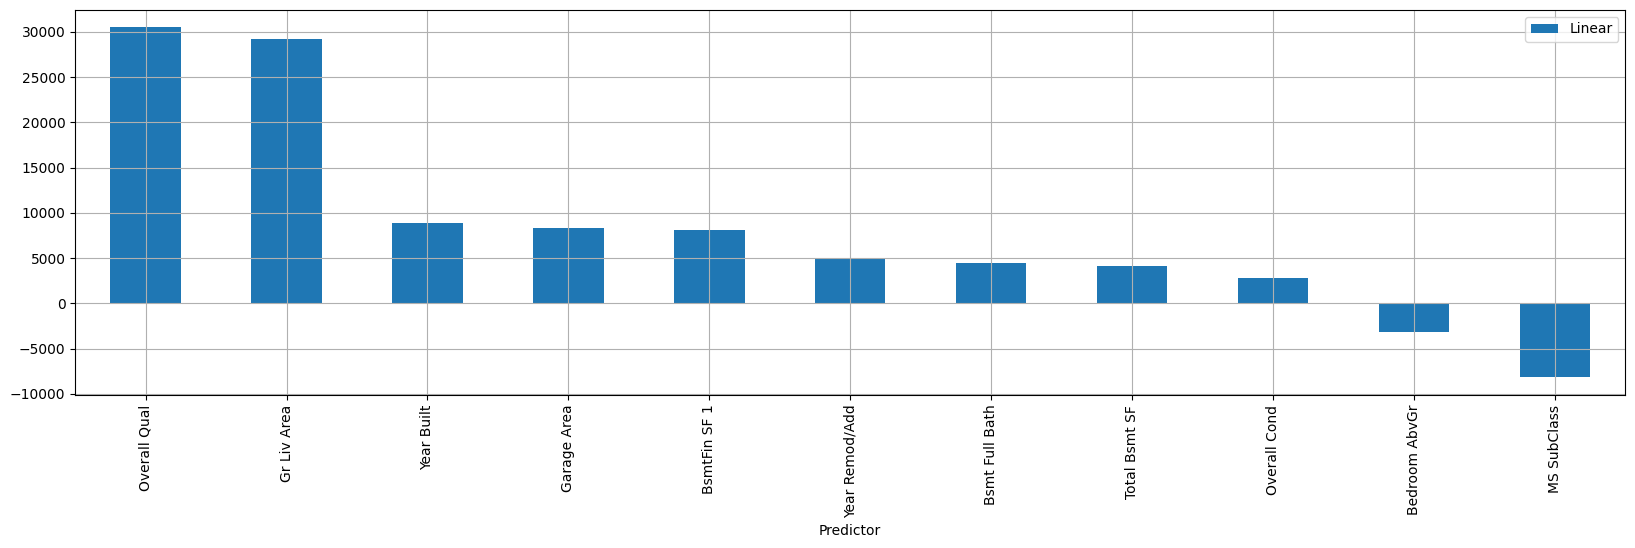

In [251]:
# Plot model coefficients
model_results = pd.DataFrame()
model_results['Predictor'] = X_linear.columns
model_results['Linear'] = model.coef_
model_results.sort_values( by = ["Linear"], ascending = False ).plot(
    x = 'Predictor',
    kind = 'bar',
    figsize = (20,5)
    )
plt.grid()



---


### Regularization - Ridge Regression

In [252]:
housing_data_int_float_df_bak = housing_data_int_float_df.copy()
housing_data_int_float_df = housing_data_int_float_df_bak.copy()

In [253]:
# First we will break up our data into training and testing sets
X_ridge = housing_data_int_float_df.drop(["SalePrice"], axis = 1).copy()
y_ridge = housing_data_int_float_df['SalePrice']

# Specify values of alpha we want to try
alph = [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1,1,5,10,20,50,70,90,120,150,180,200, 300, 500]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Calculate CV RMSE
  n = 200
  results = np.zeros(n)

  for idx in range(n):
    # Create the model
    my_fit_ridge = Ridge(alpha = i, tol = .01, max_iter=10_000); # Looping through alpha

    # Train, test split
    X_train, X_test, y_train, y_test = train_test_split(X_ridge, y_ridge, test_size=0.25)

    # Standard scale only training features
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    # Scale testing features
    X_test = scaler.transform(X_test)

    # Fit regression
    my_fit_ridge.fit(X_train, y_train)

    # Predict
    y_pred = my_fit_ridge.predict(X_test)

    # Calculate and record performance metric
    results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))

  results_alpha.append(results.mean())

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})

results_df.sort_values( by = 'RMSE' )
alpha = results_df.sort_values( by = 'RMSE' )["Alpha"].iloc[0]

print(f"Alpha: {alpha}")

# %%capture --no-stdout
# Perform CV
n = 500
results = np.zeros(n)

for idx in range(n):
  # Train, test split
  X_train, X_test, y_train, y_test = train_test_split(X_ridge, y_ridge, test_size=0.25)

  # Standard scale only training features
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)

  # Scale testing features
  X_test = scaler.transform(X_test)

  # Create the model
  model = Ridge(alpha = alpha, tol = .01, max_iter=10000)

  # Fit regression
  model.fit(X_train, y_train)

  # Predict
  y_pred = model.predict(X_test)

  # Calculate and record performance metric
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))

print(f"CV RMSE: {results.mean().round(2)}")
# RMSPE
rmspe_housing_float = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"RMSPE for Ridge Regression: {rmspe_housing_float:.4f}%")

Alpha: 20.0
CV RMSE: 34306.1
RMSPE for Ridge Regression: 21.6010%


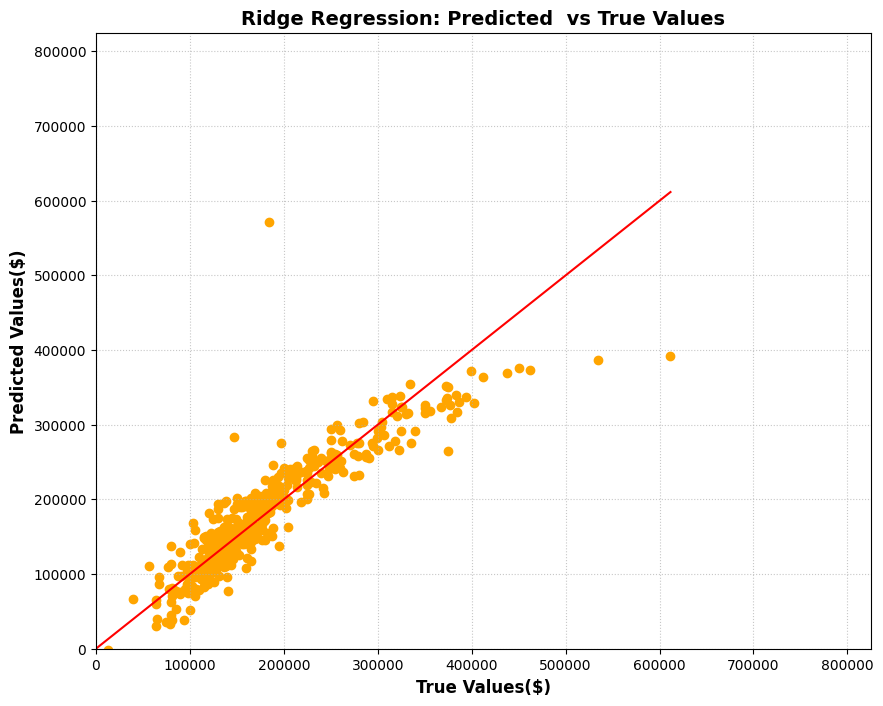

In [254]:
# Generate figure of predicted vs actual results
plt.figure(figsize=(10,8));
plt.scatter(y_test, y_pred, color="orange");
p1 = max(y_pred.max(), y_test.max())
plt.plot([0, p1],[0, p1], c='red')
plt.ylim(0,825000)
plt.xlim(0,825000)
plt.title('Ridge Regression: Predicted  vs True Values', weight='bold', fontsize=14)
plt.xlabel('True Values($)', weight='bold', fontsize=12)
plt.ylabel('Predicted Values($)', weight='bold', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.savefig("ridge_pred_true_scatter.png", bbox_inches='tight')
plt.show();

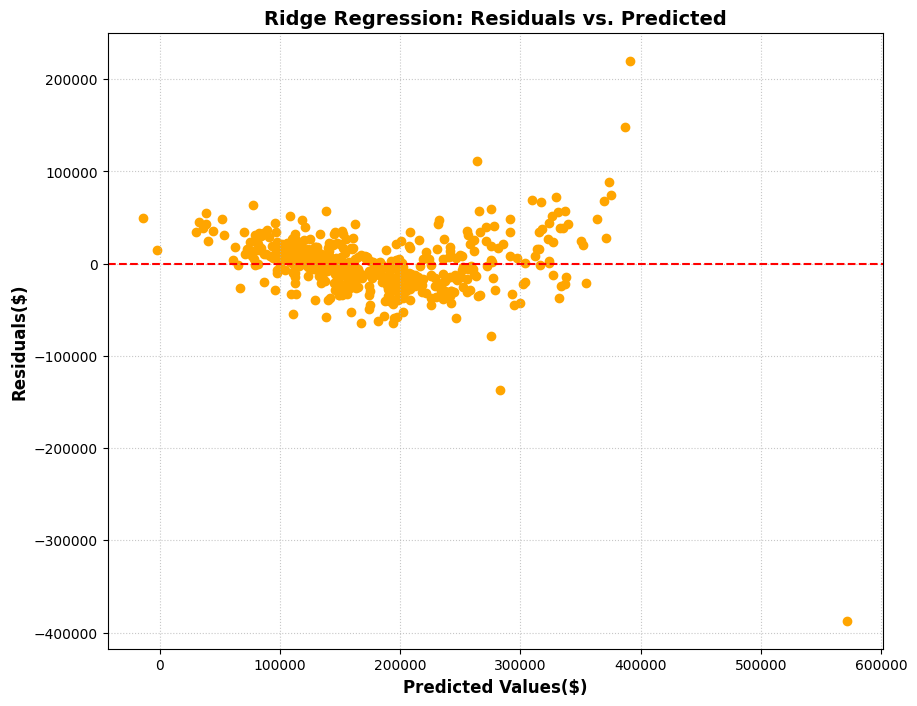

In [255]:
plt.figure(figsize=(10,8));
residuals = y_test - y_pred
plt.scatter(x=y_pred, y=residuals, color="Orange")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Ridge Regression: Residuals vs. Predicted', weight='bold', fontsize=14)
plt.xlabel('Predicted Values($)', weight='bold', fontsize=12)
plt.ylabel('Residuals($)', weight='bold', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.savefig("ridge_residuals_pred.png", bbox_inches='tight')
plt.show();

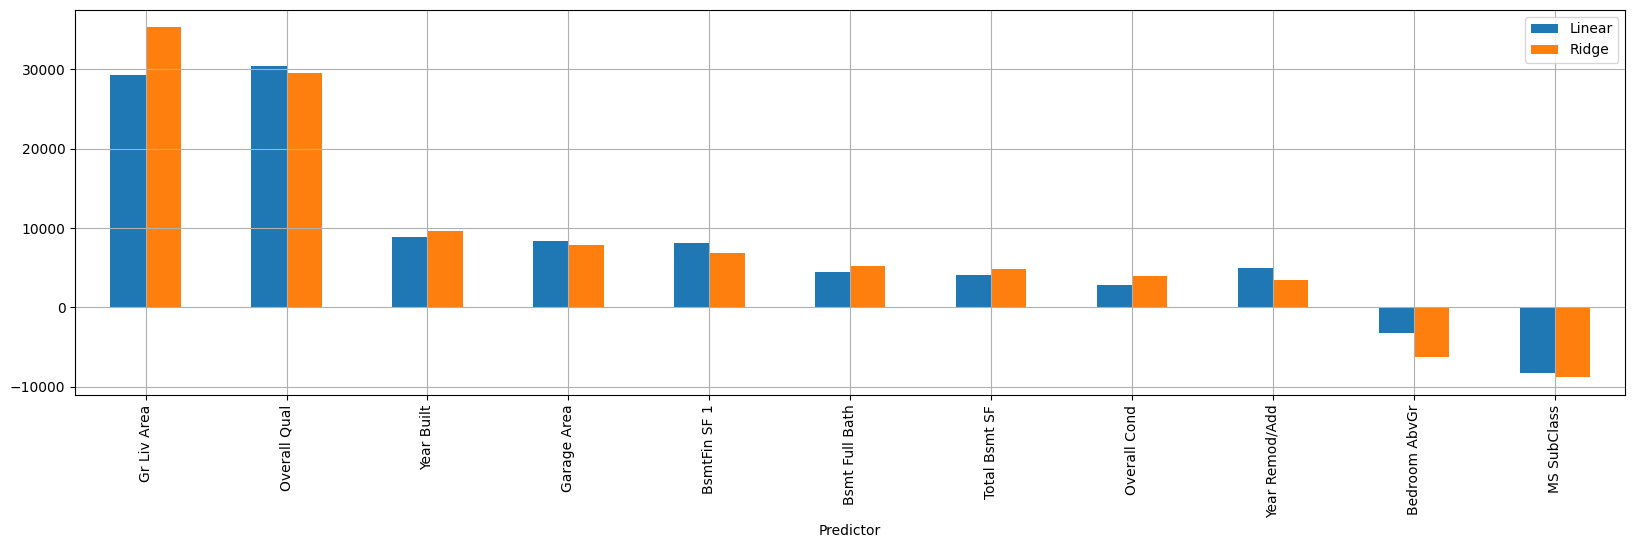

In [256]:
# Add ridge regression results to data frame we created earlier
model_results['Ridge'] = model.coef_
model_results.sort_values( by = ["Ridge"], ascending = False ).plot(
    x = 'Predictor',
    kind = 'bar',
    figsize = (20,5)
    )
plt.grid()

### Regularization - Lasso Reggression

In [257]:
# First we will break up our data into training and testing sets
X_lasso = housing_data_int_float_df.drop(["SalePrice"], axis = 1).copy()
y_lasso = housing_data_int_float_df['SalePrice']


# Specify values of alpha we want to try
alph = [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1,20,50,70,90,120,150,180,200, 300, 500]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Calculate CV RMSE
  n = 200
  results = np.zeros(n)

  for idx in range(n):
    # Create the model
    my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=10_000); # Looping through alpha

    # Train, test split
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)

    # Standard scale only training features
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    # Scale testing features
    X_test = scaler.transform(X_test)

    # Fit regression
    my_fit_lasso.fit(X_train, y_train)

    # Predict
    y_pred = my_fit_lasso.predict(X_test)

    # Calculate and record performance metric
    results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))

  results_alpha.append(results.mean())

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})

results_df.sort_values( by = 'RMSE' )
alpha = results_df.sort_values( by = 'RMSE' )["Alpha"].iloc[0]

print(f"Alpha: {alpha}")

# %%capture --no-stdout
# Perform CV
n = 500
results = np.zeros(n)

for idx in range(n):
  # Train, test split
  X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.25)

  # Standard scale only training features
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)

  # Scale testing features
  X_test = scaler.transform(X_test)

  # Create the model
  model = Lasso(alpha = alpha, tol = .01, max_iter=10000)

  # Fit regression
  model.fit(X_train, y_train)

  # Predict
  y_pred = model.predict(X_test)

  # Calculate and record performance metric
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))

print(f"CV RMSE: {results.mean().round(2)}")
# RMSPE
rmspe_housing_float = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f"RMSPE for Lasso: {rmspe_housing_float:.4f}%")

Alpha: 500.0
CV RMSE: 34208.94
RMSPE for Lasso: 19.0804%


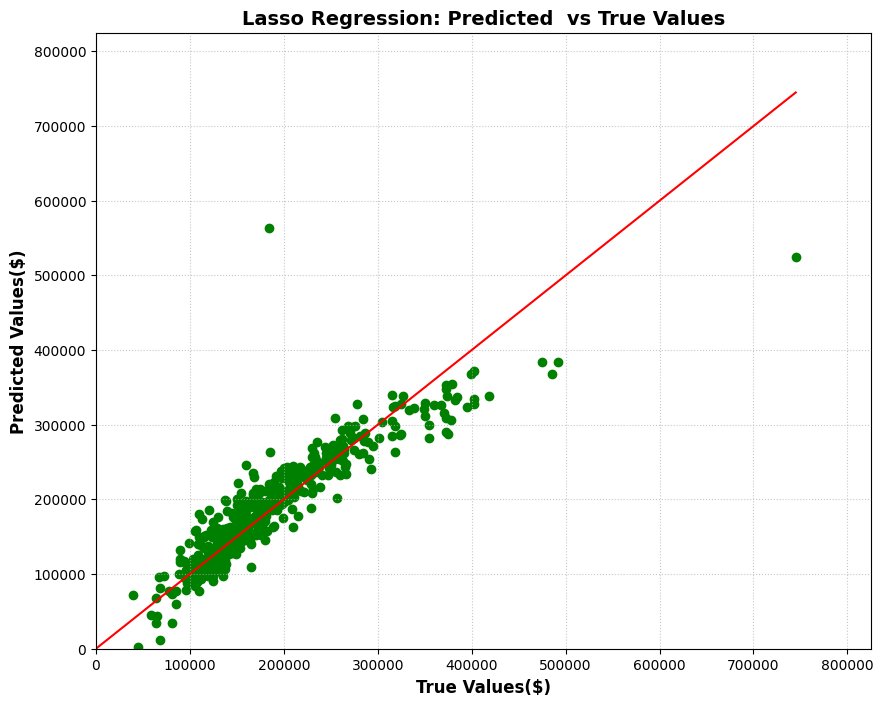

In [258]:
# Generate figure of predicted vs actual results
plt.figure(figsize=(10,8));
plt.scatter(y_test, y_pred, color= 'green');
p1 = max(y_pred.max(), y_test.max())
plt.plot([0, p1],[0, p1], c='red')
plt.ylim(0,825000)
plt.xlim(0,825000)
plt.title('Lasso Regression: Predicted  vs True Values', weight='bold', fontsize=14)
plt.xlabel('True Values($)', weight='bold', fontsize=12)
plt.ylabel('Predicted Values($)', weight='bold', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.savefig("lasso_pred_true_scatter.png", bbox_inches='tight')
plt.show();

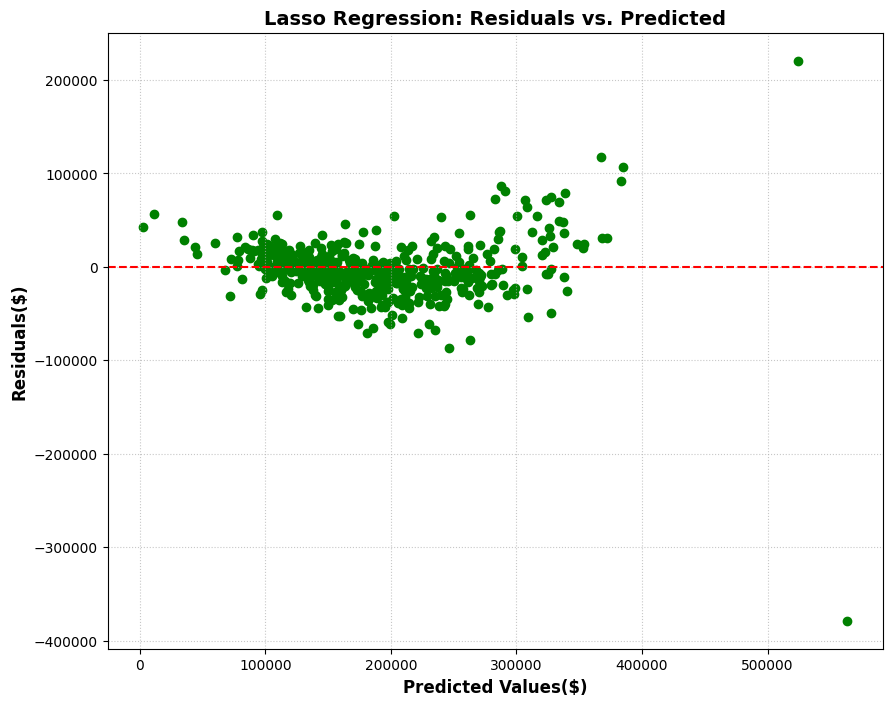

In [259]:
plt.figure(figsize=(10,8));
residuals = y_test - y_pred
plt.scatter(x=y_pred, y=residuals, color="Green")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Lasso Regression: Residuals vs. Predicted', weight='bold', fontsize=14)
plt.xlabel('Predicted Values($)', weight='bold', fontsize=12)
plt.ylabel('Residuals($)', weight='bold', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.savefig("lasso_residuals_pred.png", bbox_inches='tight')
plt.show();

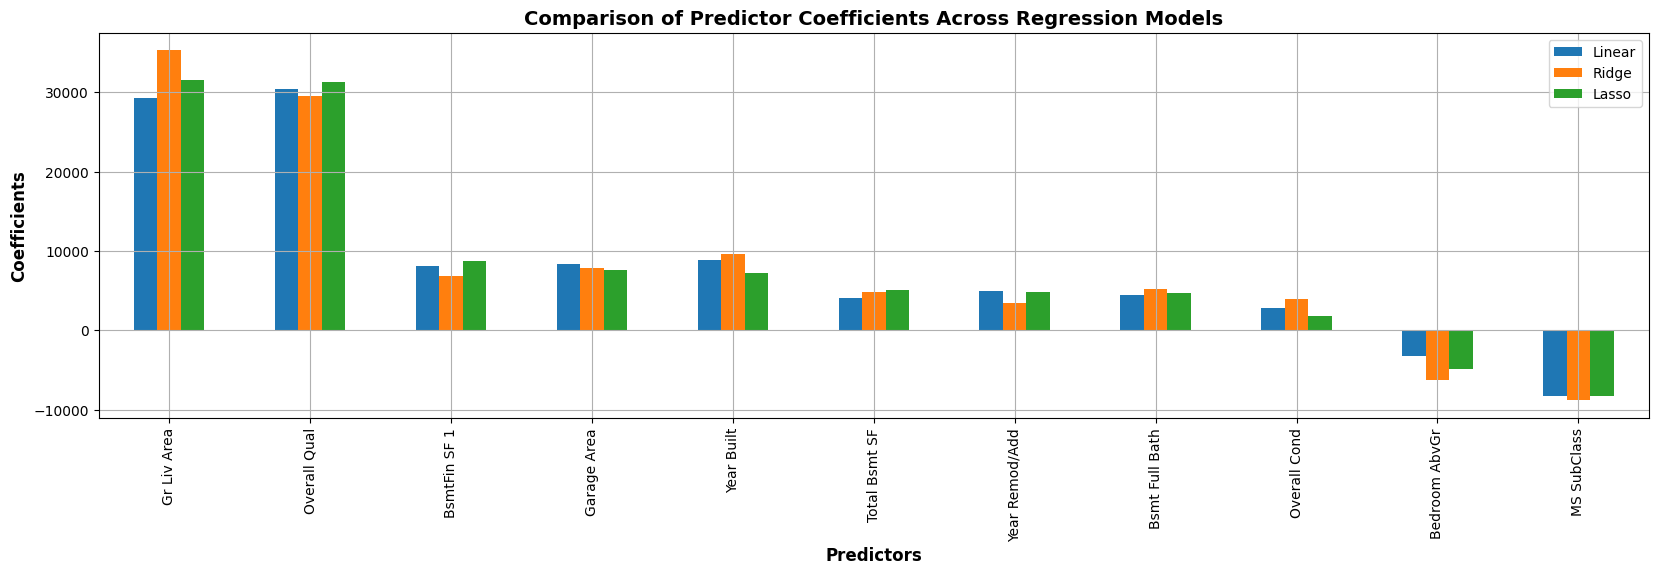

In [260]:
# Plot model coefficients
model_results["Lasso"] = model.coef_
model_results.sort_values( by = ["Lasso"], ascending = False ).plot(
    x = "Predictor",
    kind = 'bar',
    figsize = (20,5)
    )
plt.title("Comparison of Predictor Coefficients Across Regression Models", weight= "bold", fontsize= 14)
plt.xlabel("Predictors", weight ="bold", fontsize= 12)
plt.ylabel("Coefficients", weight ="bold", fontsize= 12)
plt.grid()
plt.savefig("regression_model_coefficients_comparison.png", bbox_inches='tight')
plt.show();

In [261]:
model_results

,Predictor,Linear,Ridge,Lasso
0,MS SubClass,-8197.099385,-8823.139098,-8295.936674
1,Overall Qual,30482.899591,29618.027201,31277.068728
2,Overall Cond,2835.570714,3917.422684,1859.386158
3,Year Built,8825.473296,9638.969161,7300.876390
4,Year Remod/Add,5028.122457,3485.733271,4800.055124
5,Gr Liv Area,29245.016617,35297.777081,31543.615719
6,Bedroom AbvGr,-3212.150888,-6245.022540,-4836.974093
7,BsmtFin SF 1,8092.803886,6856.428365,8820.005360
8,Total Bsmt SF,4096.202902,4894.386906,5115.844083
9,Bsmt Full Bath,4475.968719,5233.659162,4703.949766


## Data Visualization/Communication of Results
